# Confidence Interval of Model Parameter

A confidence interval is a range of values which is expected, with some quantifiable degree of confidence, to contain the value of an unknown value of interest.(Petty, 2012) For example, suppose a random sample of 100 boxes of cereal is selected from among all of the boxes filled by an automatic filling machine during a work shift. The mean weight of the 100 boxes in the sample is found to be 12.05 ounces and the standard deviation to be 0.1 ounces. Using the procedures to be described in the next section, we can calculate an interval [12.0304, 12.0696] for the mean weight of all boxes filled at the station and associate a confidence level of 0.95 (95%) with that interval.1 We call the calculated interval [12.0304, 12.0696], together with its associated confidence level, a confidence interval.

Here, we use a simple regression model to get the confidence interval and hopefully to complement what professor taught by the boostrapping method.

In [2]:
from pandas import DataFrame
import statsmodels.api as sm
import numpy as np
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt

Linear regression is used as a predictive model that assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate) and the independent variable/s (input variable/s used in the prediction).

For example, you may use linear regression to predict the price of the stock market (your dependent variable) based on the following Macroeconomics input variables:

Interest Rate
Unemployment Rate

Under Simple Linear Regression, only one independent/input variable is used to predict the dependent variable. It has the following structure:

Y = C + M*X

Y = Dependent variable (output/outcome/prediction/estimation)
C = Constant (Y-Intercept)
M = Slope of the regression line (the effect that X has on Y)
X = Independent variable (input variable used in the prediction of Y)

In [3]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           4.04e-11
Time:                        11:08:17   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

c:\users\nagoshi\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We can see from the table above, there are three model parameters, they are constant term, Interest_Rate, Unemployment_Rate with the coefficient 1798.4040, 345.5401, -250.1466 and the 95% confidence interval is [-71.685, 3668.493]

const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)

We can also find the confidence interval by the boostraping method as in the lecture note.

In [4]:
print(df.shape)

(24, 5)


In [5]:
df.sample(df.shape[0], replace=True).head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
18,2016,6,1.75,6.1,884
1,2017,11,2.50,5.3,1394
11,2017,1,2.00,5.9,1075
19,2016,5,1.75,6.1,866
2,2017,10,2.50,5.3,1357


In [6]:
bootstrap_intercepts = []
bootstrap_slopes = []

for i in range(50000):
    sample_indexes = np.random.choice(df.index, size=len(df.index))
    bootstrap_sample = df.iloc[sample_indexes]
    lr = linregress(bootstrap_sample["Unemployment_Rate"], bootstrap_sample["Stock_Index_Price"])    
    bootstrap_intercepts.append(round(lr.intercept, 3))
    bootstrap_slopes.append(round(lr.slope,3))

    
bootstrap_intercepts[:10], bootstrap_slopes[:10]

([4249.226,
  4431.168,
  4345.251,
  4223.077,
  4472.43,
  4505.934,
  3756.202,
  4262.025,
  4293.562,
  4542.962],
 [-548.494,
  -587.305,
  -566.099,
  -547.631,
  -585.418,
  -603.608,
  -462.543,
  -556.176,
  -556.41,
  -605.835])

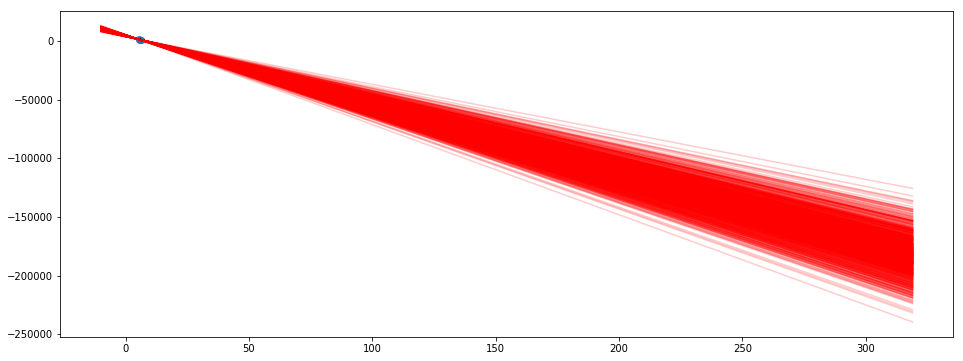

In [7]:
# why I can not get the figure here?
### which is a little bit werid

plt.figure(figsize=(16,6))

plt.scatter(df["Unemployment_Rate"], df["Stock_Index_Price"], alpha=0.2)

x_axis = np.arange(-10,320)

for i in np.random.choice(range(5000), 1000, replace=False):
    y_hat = bootstrap_intercepts[i] + bootstrap_slopes[i] * x_axis
    plt.plot(x_axis, y_hat, color='red', alpha=0.2)

[3887.298575 5054.112225]


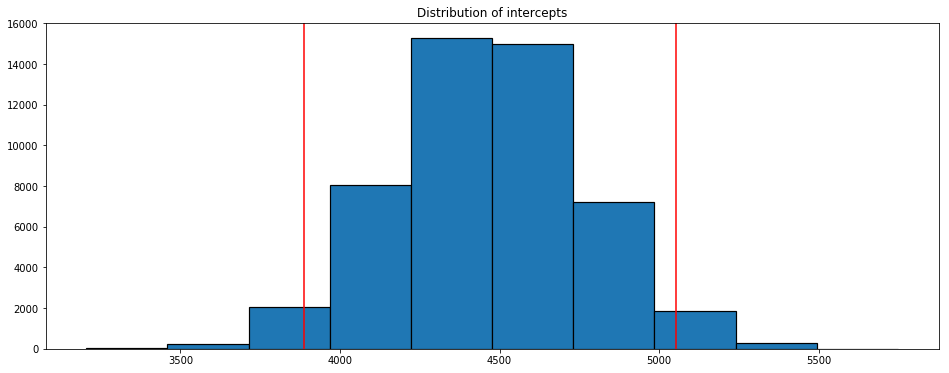

In [8]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_intercepts,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_intercepts, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")

[-692.13235  -485.896725]


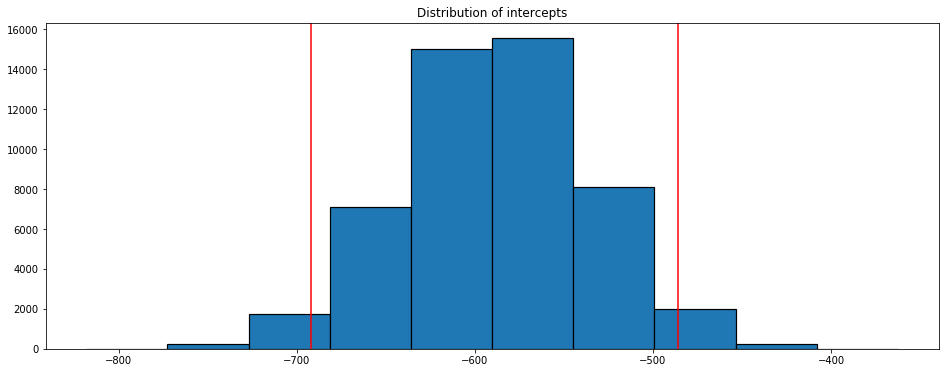

In [10]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_slopes,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")

## Multiple Linear Regression
We use linear regression to determine a general model about how one explanatory variable impacts a response variable, however it is often the case that many different explanatory variables can contribute to the response. To try and model this behavior we use multiple linear regression.

Multiple linear regression (MLR) tries to find a model of a linear relationship between the response variable and the explanatory variables. Generally, the more explanatory variables that can be added to the regression model, the more informed the model is considered to be.

For the examples in this section, we will be using data reporting the amount of dollars a company spent on TV, radio, and newspaper advertising, and what the company made in sales, over some time period. We want to find to what extent spending on each type of advertising impacts sales.


In [11]:
import pandas as pd
import statsmodels.formula.api as sm
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

### The Naive Approach to Multiple Linear Regression
The naive way of preforming a multiple linear regression is to build independent linear regressions for each explanatory variable, and then to combine the results from each.

Let's look at the linear regressions of TV, radio, and newspaper advertising on sales individually:

In [12]:
est = sm.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [13]:
est = sm.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [14]:
est = sm.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


We can see that for each of our explanatory variables, our linear regression predicts a significant effect on sales.

However, now that we have our individual linear regressions, we run into some problems with this naive approach. Firstly, we have no clear-cut way of combining each regression. Secondly, we have no way of accounting for one explanatory variable correlating with another which can over or understate the relationship between the response variable and a specific explanatory variable.

### Approaching Multiple Linear Regression
To begin with, in order to perform a multiple linear regression we rewrite our linear regression equation to account for all variables:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon
$$

For our new equation, $p$ is the number of paramaters (explanatory variables) in the model and $\beta_i$ is the average effect on $y$ for a unit increase in the predictor $x_i$, holding all other values constant. That is to say, if we increase the value of $x_i$ by one unit, we expect to see a change in the value of $y$ by the amount of $\beta_i$.

The general approach to multiple linear regression is shown in the following image. For a regression of radio and TV advertising on sales, we arrange the data in n-dimensional space (3 dimensions in this case) then try to find the hyperplane that best fits the predictors to the response variable. The values of $\beta_i$ that produce this hyperplane are what our regression reports to us.

<img src="images/plane.png">


### Using Multiple Linear Regression
We can use stats model to compute a MLR on our example data. We rewrite our multiple linear regression equation to match the parameters we want to investigate as follows:

$$
sales = \beta_0 ~~+~~ \beta_1 \times \text{TV_budget} ~~+~~ \beta_2 \times \text{radio_budget} ~~+~~\beta_3 \times \text{newspaper_budget} ~~+~~ \epsilon
$$

In [15]:
est = sm.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


### Interpreting the Results of the Regression
We have to be able to interpret the results of our regression to get any meaning from it. The 'coef' column contains the values of $\beta_i$ for each rows' explanatory variable $x_i$ from our regression equation. Using this we can write out our regression equation as follows:

$$
sales = 2.9389 ~~+~~ 0.0458 \times \text{TV_budget} ~~+~~ 0.1185 \times \text{radio_budget} ~~+~~-0.0010 \times \text{newspaper_budget} ~~+~~ \epsilon
$$

This equation tells us that for each additional \\$1000 spent on TV advertising, we expect on average, an increase in sales of 45 units, and for each additional \\$1000 spent on radio advertising, we expect on average, an increase in sales of 188 units. Since the p value for both of these variables is low (near zero in fact) we can assume that their effects on sales is significant to the model.

Further we can assume that newspaper spending is not significant in our model and thusly does not contribute to it. This is supported by the newspaper parameter's very high p value of 0.86. This means it is quite likely that any effect on sales from newspaper advertising is purely from random noise, which allows us to remove it from our model entirely.

### Interaction
The question then becomes "why was newspaper advertising insignificant on sales in the MLR model when it had a significant effect in the simple linear regression model?". Recall that in the simple linear regression, newspaper advertising was predicted to have an effect of 0.0547 with a p value of 0.001. To explain why in our multiple linear regression this effect dropped to zero, we need to look at the correlation between the variables we used.

In [16]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


As we can see, the correlation between radio advertising and newspaper advertising is about 0.35. This positive correlation indicates that in some cases, spending on radio advertising is accompanied by spending on newspaper advertising. This leads to a series of events that explains newspaper's perceived significance in the simple linear regression.

First, radio advertising increases leading to increased sales. Second, since radio advertising and newspaper advertising are correlated, newspaper advertising also increases. Then finally, since newspaper advertising and sales both increased, we observe that newspaper advertising increased sales despite the fact that radio advertising was the actual cause of the increase.

Our simple linear regression model sees this chain of events and cannot pick out the contribution to sales by radio advertising from newspaper advertising by itself, so it reports a significant relationship between newspaper advertising and sales. Our multiple linear regression model is able to take radio advertising's effect on sales out of newspaper advertising's effect on sales revealing that newspaper ads do not have a significant effect on sales.

### Important Concepts to Explore
Multiple linear regression is a powerful tool, but it is also accompanied by its share of weaknesses. Multiple linear regression can account for dozens or more predictors (explanatory variables). This means that we can create more robust models than a simple linear regression, however this also means that, as more variables are added to the model, the harder it will become to explain the model, and the harder it will become to account for the correlation between each individual predictor.

Further, if we introduce explanatory variables to the model that do not actually have a significant effect on the response variable, either due to the nature of the variable or its correlation with another variable, we can essentially spend time learning "the wrong thing". 

Because of these two concepts and their potential impacts on the model itself, determining the optimal group of explanatory variables is no simple task. There is no definitive right way to determine arguably the most important aspect of the model itself.
<br><br>
<center>
"Identifying the best subset among many variables to include in a model – is arguably the hardest part of model building." - <a href="https://link.springer.com/article/10.1057/jt.2009.26">Bruce Ratner</a>
</center>

#### Further Reading on MLR
&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://www.investopedia.com/terms/m/mlr.asp" target="_blank">Multiple Linear Regression – MLR Definition</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf#page=85" target="_blank">An Introduction to Statistical Learning with Applications in R</a>


### Non Linear Regression

Linear Regression is a useful tool to predit linear relationships, but actual underlying models are rarely linear. However, this doesn't mean that linear regression is useless. In fact, assuming linearity is often good enough for a problem you are trying to solve. 

For a simple example, say you are trying to calculate your company's predicted sales for the upcoming year. The previous year's sales were \\$10,000,000, an increase of \\$50,000 from the previous year. The year before that had an increase of \\$46,000, and decreased \\$22,000 for the year before that one, and so on. It is possible to create a model to predict next year's sales within a range of a few thousands, but is that really necessary? A linear model that is accurate within ten or twenty thousand is often good enough. When you have sales of $10,000,000, being off by a few thousand or ten thousand, in other words 0.01\% or 0.01\%,  does not make much of a difference in the grand scheme of things.

Often times it is a good idea to create a simple model to interpret before putting more work into improving that model. Taking the previous example, say instead of next year's sales, you need to predict the sales for the next 20 years. If the underlying model was in fact not linear, then the linear model that was "good enough" for the next year, may have a large margin of error 20 years down the line. At this point, exploring non-linear models might be a good idea. The main idea is to always be aware of diminishing returns when improving your model, especially with big data.



### The Telltales of Non-linearity

How do you determine if your data is non-linear? Sometimes it is best to just visualize the data (if you can) and see if it is linear or not. 

For example if the data follows:$$y = 30 -0.5 x +0.005 x^2 + \epsilon$$

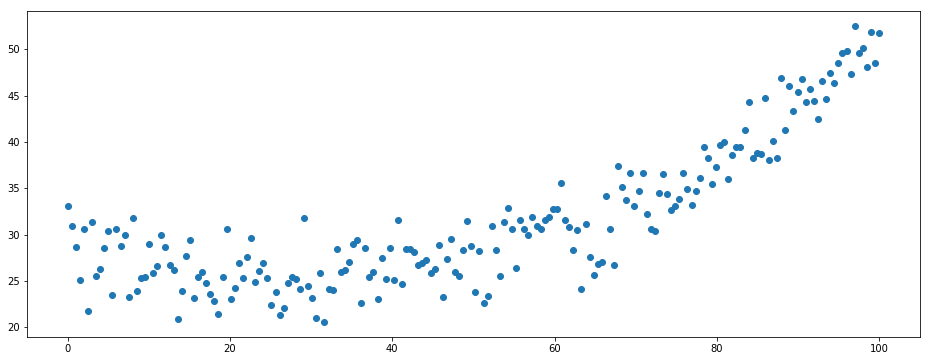

In [7]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
plt.scatter(x,y)

We can clearly see from the plot that the data is non-linear.

Another way to determine non-linearity is by looking at the error terms.

Text(0.5, 1.0, 'Residuals plot')

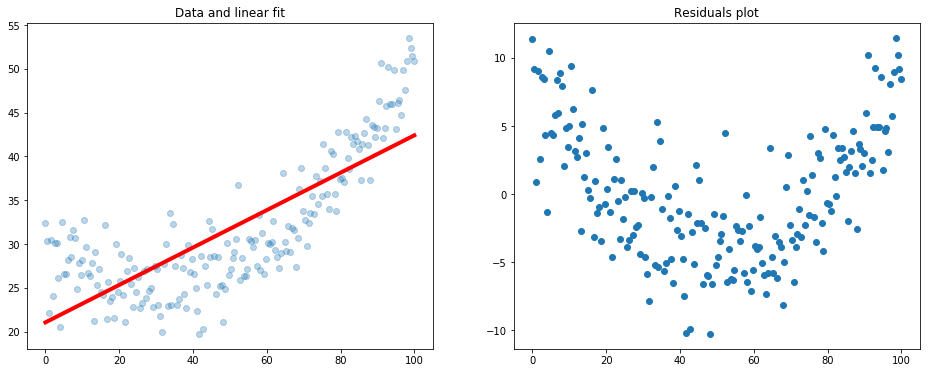

In [6]:
lm = linregress(x, y)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, lm.intercept + lm.slope * x, color='r', linewidth=4)
plt.title("Data and linear fit")

RSS_vals = []
for (x_i, y_i) in zip(x,y):
    y_hat = lm.intercept + lm.slope * x_i 
    RSS_vals.append(y_i - y_hat)

plt.subplot(1,2,2)
  
plt.scatter(x, RSS_vals)
plt.title("Residuals plot")

For a linear model, finding a regression line would produce error terms that are independently and identically distributed (i.i.d.). In other words, the error $\epsilon$ is similar to a normal distribution $\mathcal{N}(\mu,\sigma)$. However, from the Residuals plot above we can see that that is not the case. Our linear fits the data better near the middle, but has a majority of larger errors near the tail-ends. This implies that the data is not linear.

### Nearest Neighbor Regression

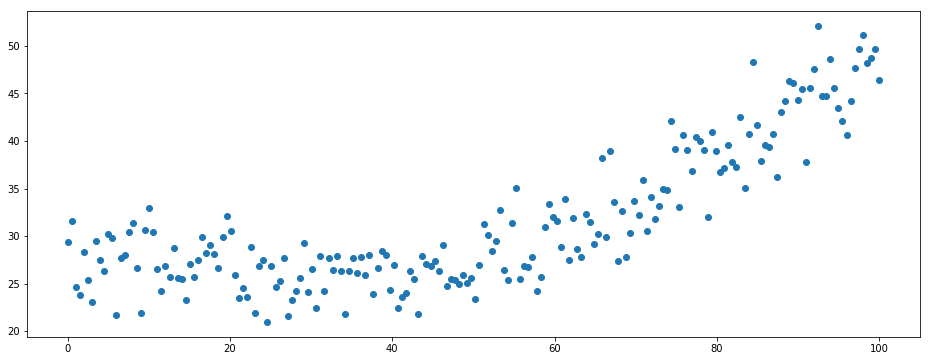

In [10]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
plt.scatter(x,y)

In the case that the data is non-linear, the nearest neighbors method can be used. In this method, the model is equal to the average of the $k$ nearest points, the value of $k$ determines the number of neighbors. This regression can be used in the data above because there is enough data to get a relatively accurate model. As the plot below shows, the red dots represent the neighbors closest to $x = 70$.

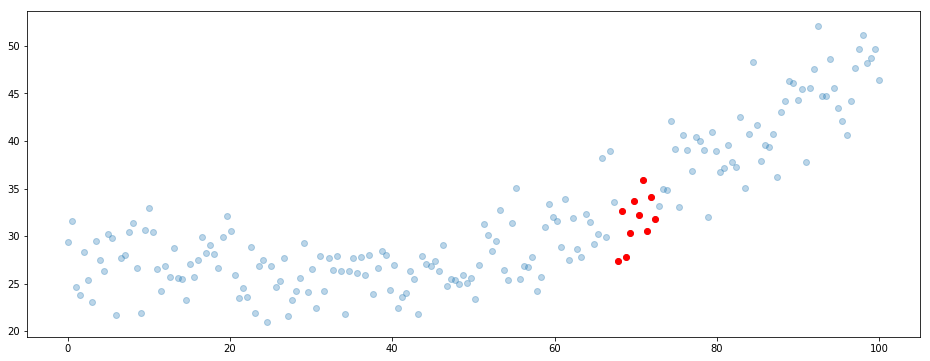

In [17]:
plt.figure(figsize=(16,6))

pos = np.searchsorted(x, 70)
neighbors = np.arange(pos-5, pos+5)

plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red")

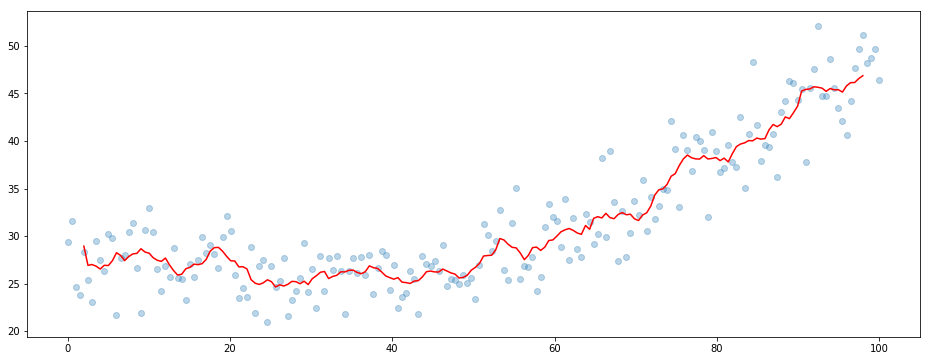

In [18]:
plt.figure(figsize=(16,6))

reg_line = []
for i in x[4:-4]:
    pos = pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_line.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_line, color="red") 

Taking the average the nearest neighbors of $x$ gives us the plot above, which shows a pretty accurate regression and represents the trend of the data fairly well. However, this is not always the case. There are instances where the Nearest Neighbor method is not recommended; for example, if there's too much data. This method should not be used when there are too many independent variables or predictors. Another case where it's not recommended to use this method is with high dimensional data because distances between data matters less, rendering this method useless. Lastly, the nearest neighbor method relies on the points around each $x$ point, so the value of each model $x$ point is highly affected by outliers.